In [1]:
# Необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# Считывание данных
df = pd.read_csv('abalone_names.data')
# Просмотр данных
df.head(5)


,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Для дальнейшей визуальной интерпретации главных компонент отделяем котегориальный признак Gender

# Переводим словесные идентификаторы признака в числовые и записываем в массив y
dct = {'M': 0,'F': 1,'I':2}
y = df['Gender'].map(dct)
# Задаем метки категориального признака Gender для графика
target_names = ['Male', 'Female', 'Infant']

# Записываем остальные признаки в массив X
X = df.drop(['Gender'], axis= 1)

X[0:4]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


In [4]:
# сбалансированность классов
df['Gender'].value_counts()

,count
Gender,
M,1528
I,1342
F,1307


In [5]:
# Осуществляем стандартизацию исходных данных (на основе среднего значения и стандартного отклонения)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit(X).transform(X)
# результат
X_st[0:4]

array([[-0.57455813, -0.43214879, -1.06442415, -0.64189823, -0.60768536,
        -0.72621157, -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, -1.23027711, -1.17090984,
        -1.20522124, -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, -0.30946926, -0.4634999 ,
        -0.35668983, -0.20713907, -0.28962385],
       [-0.69947638, -0.43214879, -0.34709919, -0.63781934, -0.64823753,
        -0.60759966, -0.60229374,  0.02057072]])

In [6]:
%%bash
# Install UMAP/hdbscan (recommend to do this before miniconda)
pip install --quiet umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


In [7]:
# устанавливаем umap
import umap

Параметры метода umap:

**n_neighbors - число соседей**

Варьируя этот параметр, можно выбирать, что важнее сохранить в новом пространственном представлении данных: глобальную или локальную структуру данных. Маленькие значения параметра означают, что, пытаясь оценить пространство, в котором распределены данные, алгоритм ограничивается малой окрестностью вокруг каждой точки, то есть пытается уловить локальную структуру данных (возможно в ущерб общей картине). С другой стороны большие значения n_neighbors заставляют UMAP учитывать точки в большей окрестности, сохраняя глобальную структуру данных, но упуская детали.

**min_dist - минимальное расстояние** (0.1 - 1)

Данный параметр стоит понимать буквально: он определяет минимальное расстояние, на котором могут находиться точки в новом пространстве. Низкие значения стоит применять в случае, если вас интересует, на какие кластеры разделяются ваши данные, а высокие — если вам важнее взглянуть на структуру данных, как единого целого.

**metric - метрика расстояния**
Параметр определяет, каким образом будут рассчитаны расстояния в пространстве исходных данных. Выбор метрики зависит от того, как мы интерпретируем эти данные и их типа. К примеру, работая с текстовой информацией, предпочтительно использовать косинусное расстояние (metric='cosine').

Поддерживаемые типы метрик:

* Minkowski style metrics (euclidean, manhattan, chebyshev, minkowski)
* Miscellaneous spatial metrics (canberra, braycurtis, haversine)
* Normalized spatial metrics (mahalanobis, wminkowski, seuclidean)
* Angular and correlation metrics (cosine, correlation)
* Metrics for binary data (hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule)

**n_components - размерность конечного пространства**

Параметр определяет размерность итогового пространства. Если вам нужно визуализировать данные, то следует выбирать 2 или 3. Если же использовать преобразованные вектора в качестве данных для моделей машинного обучения, то можно и больше.

In [8]:
# применяем umap для 2х компонент
u_result = umap.UMAP(n_neighbors=5,
                     min_dist=0.1,
                     metric='euclidean',
                     n_components = 2).fit_transform(X_st)

In [9]:
# выводим полученные значения компонент
u_result

array([[13.264528 , -3.4349182],
       [-2.5818386,  1.5248445],
       [ 7.9127126, -1.3991929],
       ...,
       [10.99874  ,  7.1796207],
       [10.229269 ,  5.575319 ],
       [13.634457 , 12.896679 ]], dtype=float32)

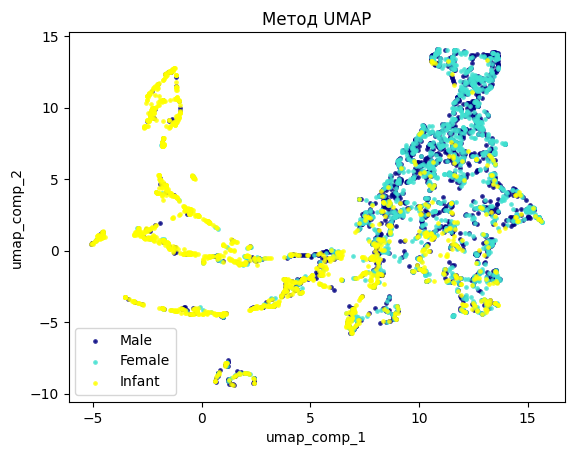

<Figure size 640x480 with 0 Axes>

In [10]:
# Визуализируем результаты применения метода umap и интерпретируем результаты

# Отобразим на графике результат применения метода umap
# (при числе компонент = 2), где каждый класс признака Gender имеет свой цвет
plt.figure()
colors = ['navy', 'turquoise', 'yellow']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(u_result[y == i, 0], u_result[y == i, 1], color=color,
                alpha=.8, lw=lw, s=2, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод UMAP')
plt.xlabel('umap_comp_1')
plt.ylabel('umap_comp_2')
plt.figure()
plt.show()

Визуально можно классы различить.

In [11]:
#  Определим функцию построения графика по результатам применения метода umap с разними параметрами

def draw_umap(n_neighbors=5, min_dist=0.1, n_components=2, metric='euclidean', title='', data=X):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['navy', 'turquoise', 'yellow']
    lw = 2
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
          plt.scatter(u[y == i, 0], u[y == i, 1], color=color,
                      alpha=.8, lw=lw, s=2, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title, fontsize=18)

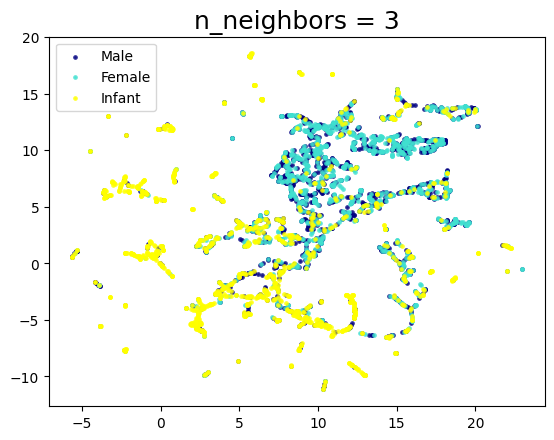

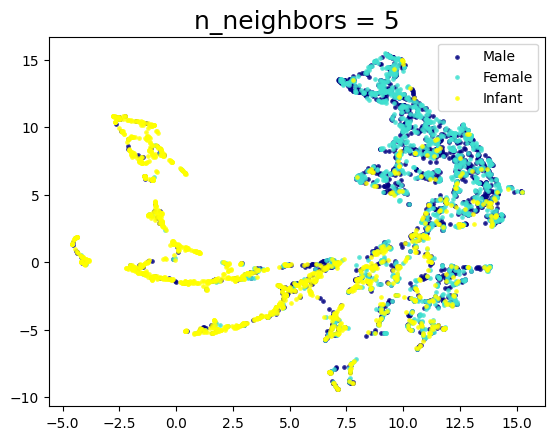

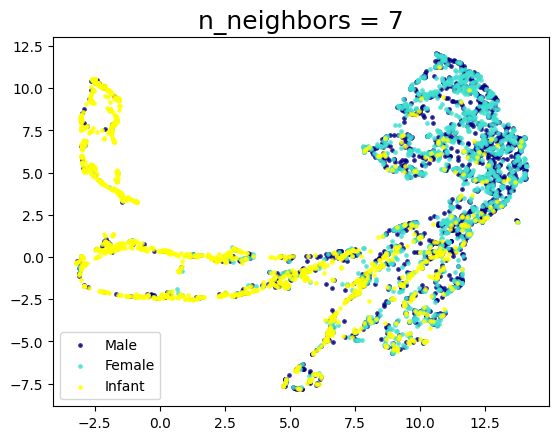

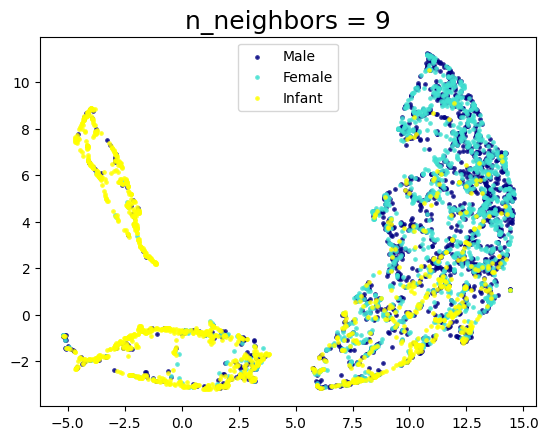

In [12]:
# Выведем графики при разном значении параметра n_neighbors
for n in (3, 5, 7, 9):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n), data=X_st)

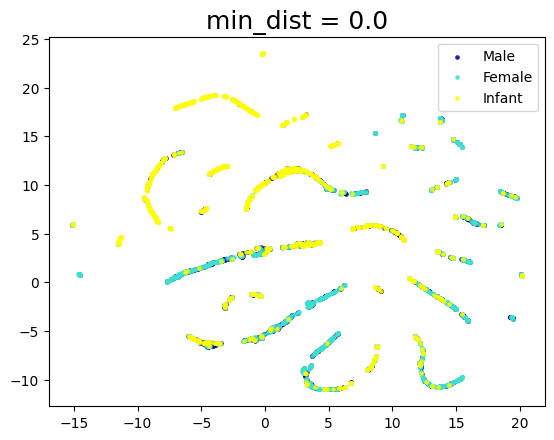

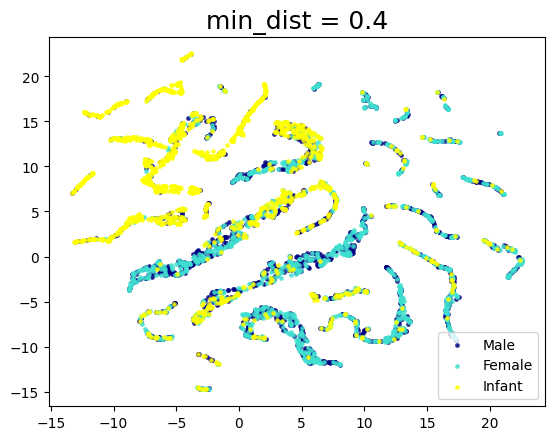

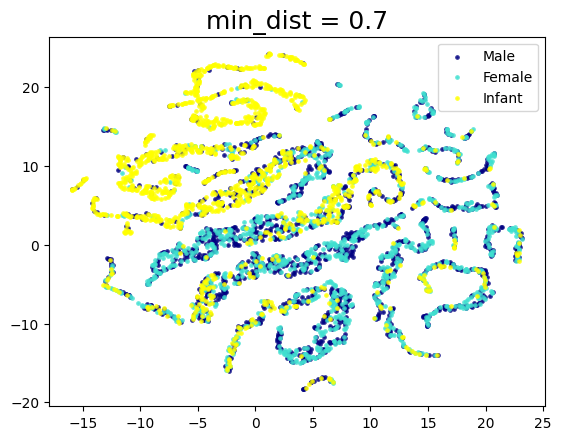

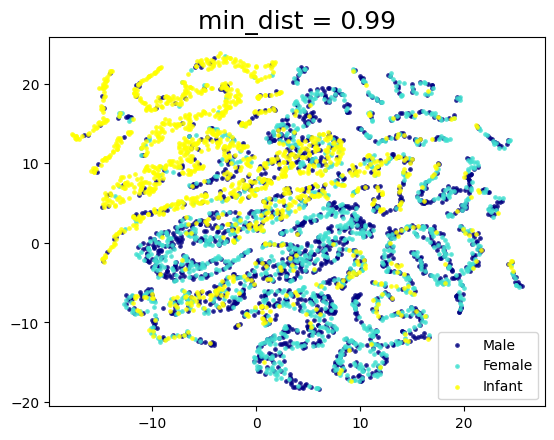

In [13]:
# Выведем графики при разном значении параметра min_dist
for d in (0.0, 0.4, 0.7, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

/usr/local/lib/python3.10/dist-packages/pynndescent/pynndescent_.py:939: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


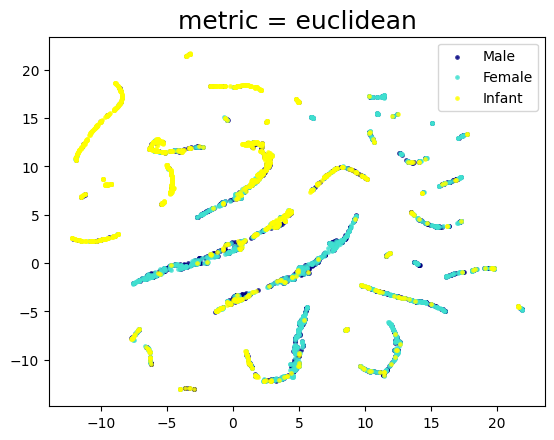

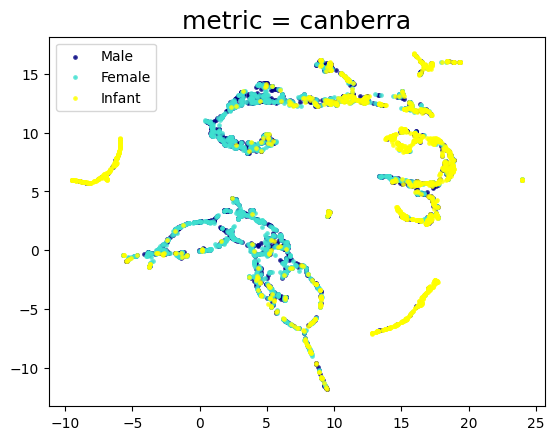

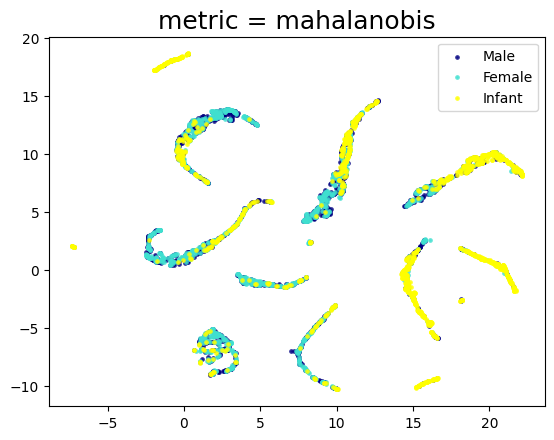

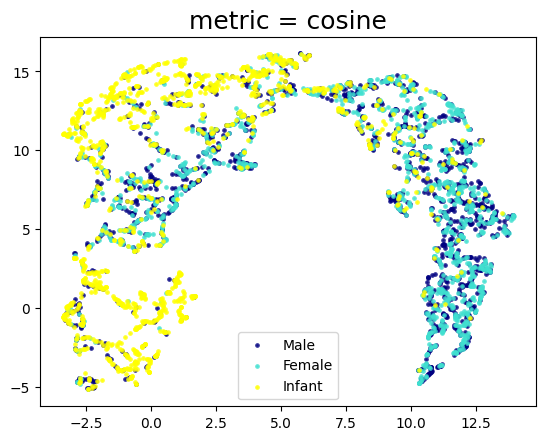

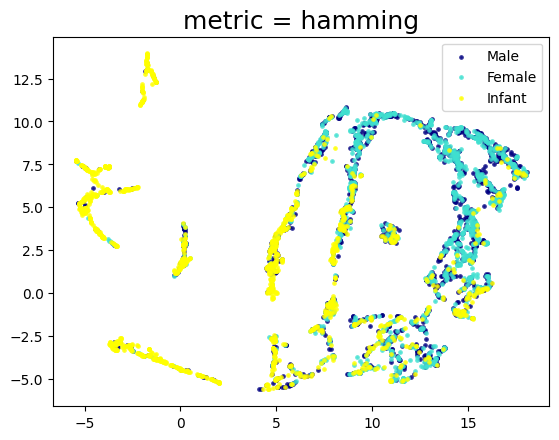

In [14]:
# Выведем графики при разном значении параметра metric
for m in ("euclidean", 'canberra', 'mahalanobis', 'cosine', 'hamming'):
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(m))